# High-level categorisation

**Hashtag Frequency**

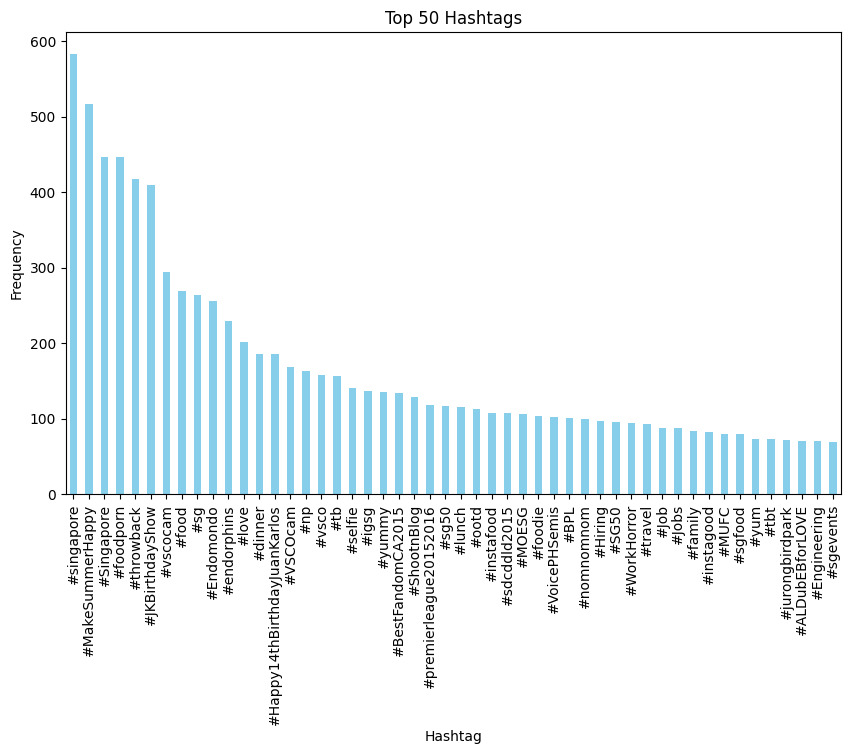

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your tweets data into a DataFrame (assuming it's stored in a CSV file)
df = pd.read_csv(r'./sample_data/task3_tweets.csv')


# Extract hashtags from the 'text' column
df['hashtags'] = df['text'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtag_counts = df['hashtags'].explode().value_counts()

# Plot the top N hashtags
top_n = 50
plt.figure(figsize=(10, 6))
hashtag_counts.head(top_n).plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.show()


##Trending Hashtag Analysis




This analyses definition of ORS - what ORS activity is popular at a given time of the day.
This code is designed to analyze and visualize the frequency of the top 50 hashtags related to outdoor recreation activities during different times of the day (morning, afternoon, evening, and night).

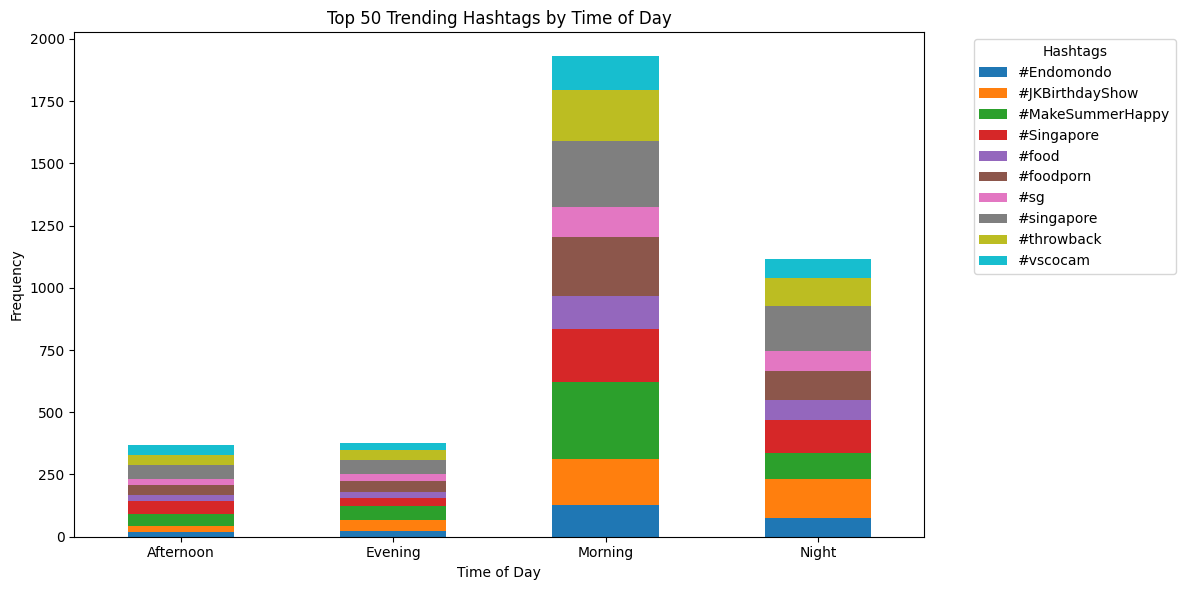

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'df' with a 'created_at' column in datetime format
# and a 'hashtags' column containing lists of hashtags

# Convert 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract hashtags from the 'hashtags' column and create a new DataFrame
hashtags_df = df['hashtags'].explode().reset_index(name='hashtag')

# Define time of day bands (morning, afternoon, evening, night)
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from the 'created_at' column and create a new column 'time_of_day'
hashtags_df['time_of_day'] = df['created_at'].dt.hour.apply(get_time_of_day)

# Group by time of day and count the frequency of each hashtag for each time of day
time_of_day_hashtag_counts = hashtags_df.groupby(['time_of_day', 'hashtag']).size().reset_index(name='count')

# Find the top 50 hashtags
top_50_hashtags = time_of_day_hashtag_counts.groupby('hashtag')['count'].sum().nlargest(10).index

# Filter the data for the top 50 hashtags
top_50_hashtag_counts = time_of_day_hashtag_counts[time_of_day_hashtag_counts['hashtag'].isin(top_50_hashtags)]

# Pivot the data to have time of day as index and hashtags as columns
pivot_table = top_50_hashtag_counts.pivot(index='time_of_day', columns='hashtag', values='count').fillna(0)

# Plot the frequency of the top 50 hashtags over time of day as a bar chart
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Top 50 Trending Hashtags by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.legend(title='Hashtags', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


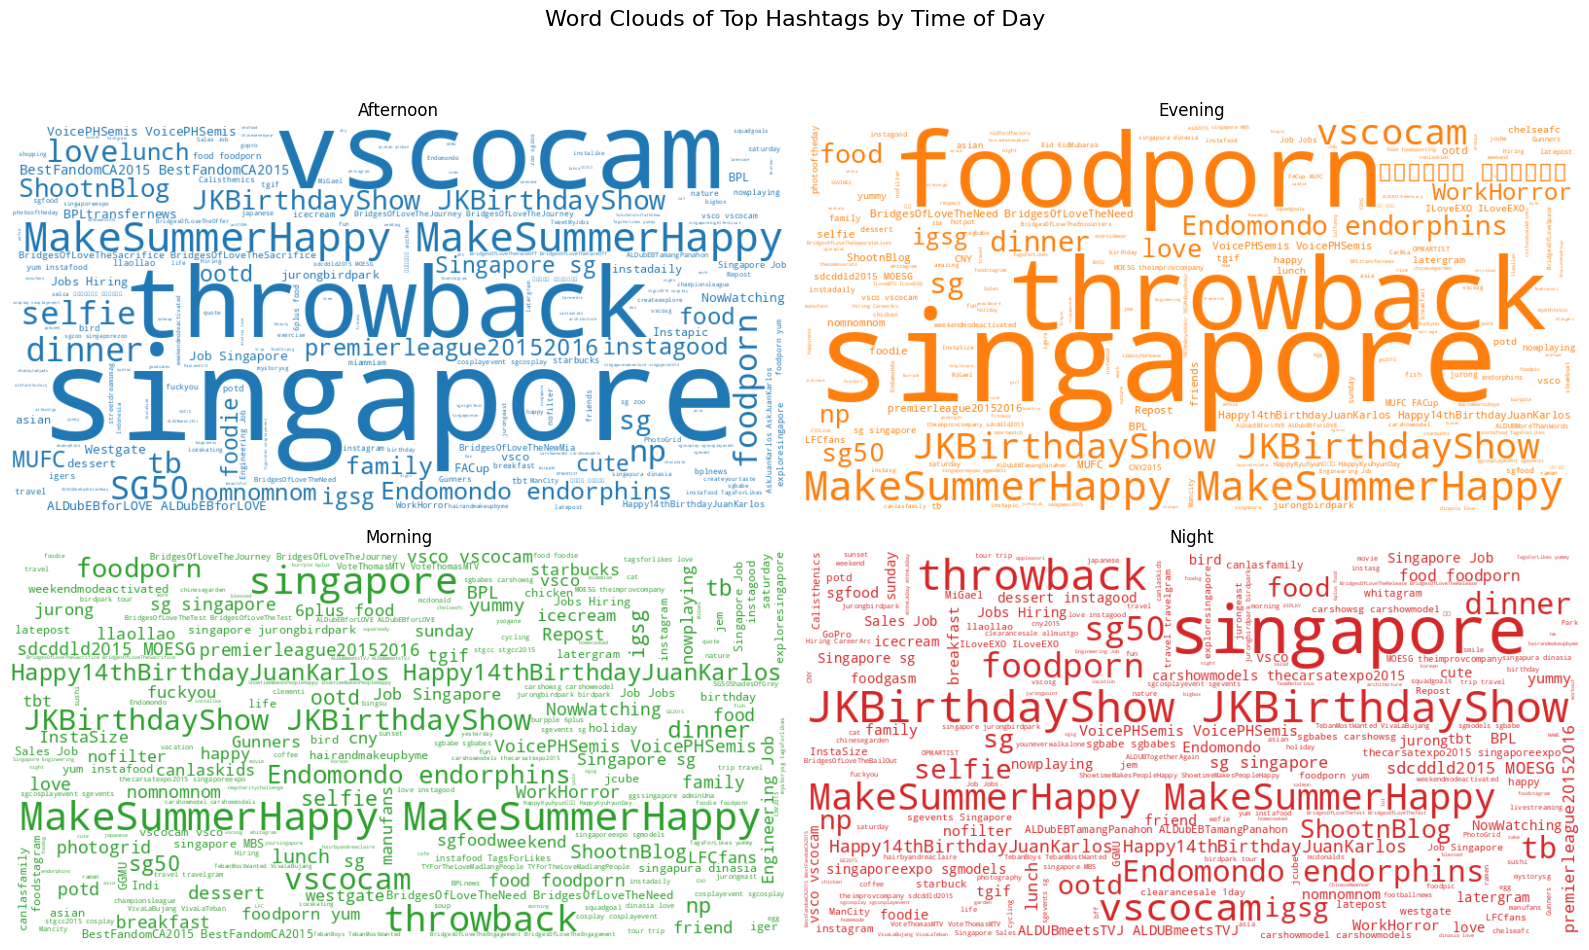

In [ ]:
'''most popular words at given time of day'''
from wordcloud import WordCloud
import matplotlib.colors as mcolors

# Assuming you have a pandas DataFrame called 'df' with a 'created_at' column in datetime format
# and a 'hashtags' column containing lists of hashtags

# Convert 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract hashtags from the 'hashtags' column and create a new DataFrame
hashtags_df = df['hashtags'].explode().reset_index(name='hashtag')

# Ensure that the 'hashtags' column contains only string values and remove NaN values
hashtags_df['hashtag'] = hashtags_df['hashtag'].astype(str).replace('nan', '', regex=True)

# Filter out rows with empty hashtags
hashtags_df = hashtags_df[hashtags_df['hashtag'] != '']

# Define time of day bands (morning, afternoon, evening, night)
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from the 'created_at' column and create a new column 'time_of_day'
hashtags_df['time_of_day'] = df['created_at'].dt.hour.apply(get_time_of_day)

# Group by time of day and concatenate hashtags within each time of day
time_of_day_hashtags = hashtags_df.groupby('time_of_day')['hashtag'].apply(lambda x: ' '.join(x)).reset_index()

# Define custom colors for each time of day
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create word clouds for each time of day with custom colors
plt.figure(figsize=(16, 10))
for i, row in time_of_day_hashtags.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap=mcolors.ListedColormap([custom_colors[i]]), random_state=42).generate(row['hashtag'])
    plt.subplot(2, 2, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row['time_of_day'])
    plt.axis("off")

plt.suptitle('Word Clouds of Top Hashtags by Time of Day', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Geospatial Analysis

Heatmap of how far the hashtags are from SG (I have downloaded all 50 on my machine) If you run my code you can download heatmap of all 50. I don't want do send you all 50 heatmaps through email.

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import os

# Define the center coordinates for Singapore
latitude_center = 1.3521
longitude_center = 103.8198

# Create a map centered at the specified location
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

# Load your DataFrame 'df' with the tweets data
# Assuming you have a DataFrame with columns 'hashtags', 'latitude', and 'longitude'

# Convert the 'hashtags' column to strings
df['hashtags'] = df['hashtags'].astype(str)

# Get the top 50 hashtags
top_50_hashtags = df['hashtags'].explode().value_counts().nlargest(50).index

# Define the folder where you want to save the heatmaps
output_folder = 'heatmaps'

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Create a heatmap for each of the top 50 hashtags and save them in the folder
for hashtag in top_50_hashtags:
    # Filter tweets with the specific hashtag
    filtered_tweets = df[df['hashtags'].apply(lambda hashtags: hashtag in hashtags)]

    # Create a heatmap of tweet locations for the hashtag
    heat_data = [[tweet['latitude'], tweet['longitude']] for _, tweet in filtered_tweets.iterrows()]
    HeatMap(heat_data).add_to(m)

    # Save the map as an HTML file with the hashtag name in the specified folder
    map_filename = os.path.join(output_folder, f'heatmap_{hashtag}.html')
    m.save(map_filename)

print(f"Heatmaps saved in folder: {output_folder}")


Heatmaps saved in folder: heatmaps


## Keyword Analysis - TFIDF

In [ ]:
import re

# Preprocessing function
def preprocess_text(text):
    # Check if the text is not NaN or None
    if pd.notna(text):
        # Convert text to lowercase
        text = text.lower()

        # Remove special characters and punctuation
        text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

# Apply preprocessing to your text data
df['cleaned_text'] = df['text'].apply(preprocess_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fill NaN values in the 'cleaned_text' column with an empty string ('')
df['cleaned_text'].fillna('', inplace=True)

# Fit and transform your text data to calculate TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame for easier visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())



   abang  able  abt  actually  ada  ade   af  afiqanatasya  afternoon  ago  \
0    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   
1    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   
2    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   
3    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   
4    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   

   ...  young  youre  youve   yr  yuhua  yummy  yung   zz  zzz  zzzz  
0  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  
1  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  
2  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  
3  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  
4  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  

[5 rows x 1000 columns]


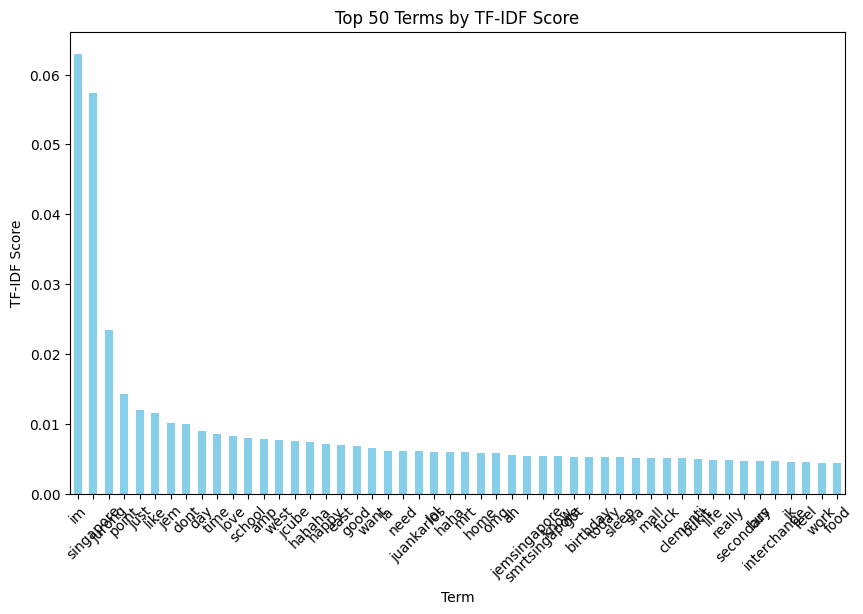

In [ ]:
# Calculate the mean TF-IDF score for each term across all documents
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF scores
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Plot the top N terms by TF-IDF score
top_n = 50  # You can adjust this number as needed
plt.figure(figsize=(10, 6))
sorted_terms[:top_n].plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Terms by TF-IDF Score')
plt.xlabel('Term')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


### Unigram, Bigram, Trigram

   abang  able  abt  actually  ada  ade   af  afiqanatasya  afternoon  ago  \
0    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   
1    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   
2    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   
3    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   
4    0.0   0.0  0.0       0.0  0.0  0.0  0.0           0.0        0.0  0.0   

   ...  young  youre  youve   yr  yuhua  yummy  yung   zz  zzz  zzzz  
0  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  
1  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  
2  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  
3  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  
4  ...    0.0    0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0   0.0  

[5 rows x 1000 columns]


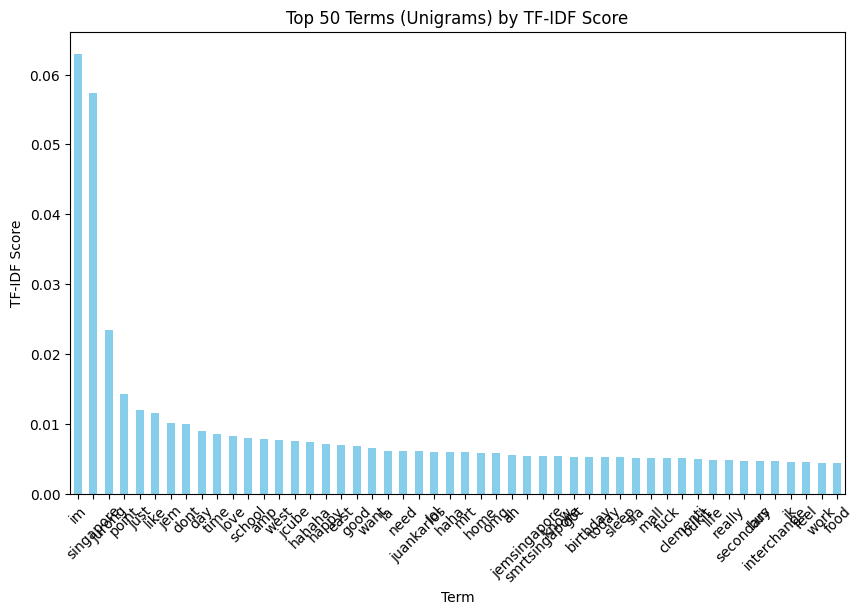

In [ ]:
import math
# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    if isinstance(text, float) and math.isnan(text):
        return ''
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

# Apply preprocessing to your text data
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Initialize the TF-IDF vectorizer with unigrams, bigrams, and trigrams
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 1))

# Fit and transform your text data to calculate TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame for easier visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

# Calculate the mean TF-IDF score for each term across all documents
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF scores
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Plot the top N terms by TF-IDF score
top_n = 50  # You can adjust this number as needed
plt.figure(figsize=(10, 6))
sorted_terms[:top_n].plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Terms (Unigrams) by TF-IDF Score')
plt.xlabel('Term')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


   aashiq restaurant  abang olgasyahputra  absolutely free  act like  \
0                0.0                  0.0              0.0       0.0   
1                0.0                  0.0              0.0       0.0   
2                0.0                  0.0              0.0       0.0   
3                0.0                  0.0              0.0       0.0   
4                0.0                  0.0              0.0       0.0   

   activesg bukit  afiqanatasya pinkbulletsx  aiman cafe  aku nak  aku tak  \
0             0.0                        0.0         0.0      0.0      0.0   
1             0.0                        0.0         0.0      0.0      0.0   
2             0.0                        0.0         0.0      0.0      0.0   
3             0.0                        0.0         0.0      0.0      0.0   
4             0.0                        0.0         0.0      0.0      0.0   

   al mukminin  ...  yoogane singapore  yoogane westgate  yuan ching  \
0          0.0  ...       

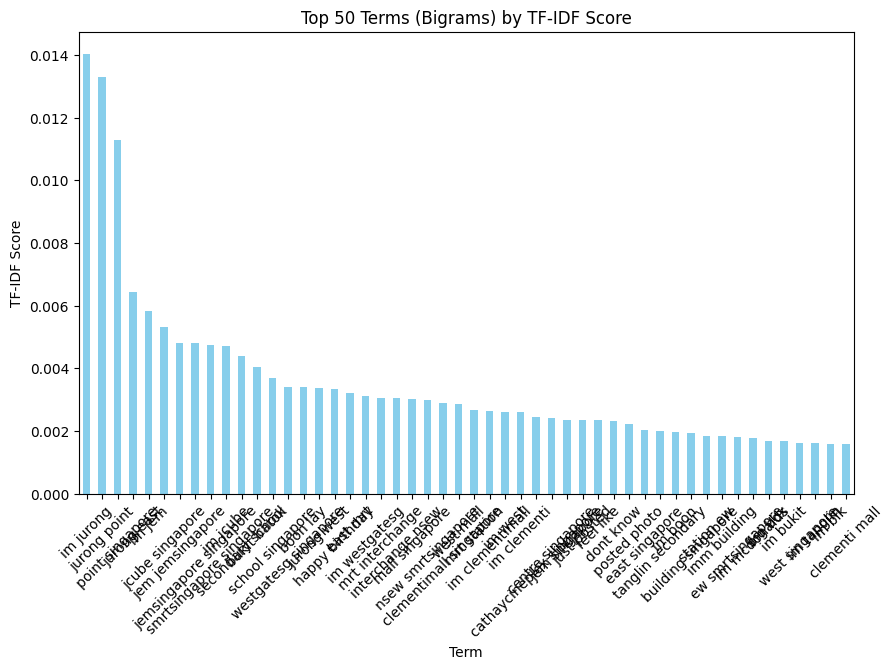

In [ ]:

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    if isinstance(text, float) and math.isnan(text):
        return ''
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

# Apply preprocessing to your text data
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Initialize the TF-IDF vectorizer with unigrams, bigrams, and trigrams
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(2, 2))

# Fit and transform your text data to calculate TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame for easier visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

# Calculate the mean TF-IDF score for each term across all documents
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF scores
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Plot the top N terms by TF-IDF score
top_n = 50  # You can adjust this number as needed
plt.figure(figsize=(10, 6))
sorted_terms[:top_n].plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Terms (Bigrams) by TF-IDF Score')
plt.xlabel('Term')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


   absolutely free amp  activesg bukit gombak  activesg gym singapore  \
0                  0.0                    0.0                     0.0   
1                  0.0                    0.0                     0.0   
2                  0.0                    0.0                     0.0   
3                  0.0                    0.0                     0.0   
4                  0.0                    0.0                     0.0   

   activesg jurong east  adix amazing look  aiman cafe singapore  \
0                   0.0                0.0                   0.0   
1                   0.0                0.0                   0.0   
2                   0.0                0.0                   0.0   
3                   0.0                0.0                   0.0   
4                   0.0                0.0                   0.0   

   al mukminin singapore  alif restaurant bukit  amazing look session  \
0                    0.0                    0.0                   0.0   
1     

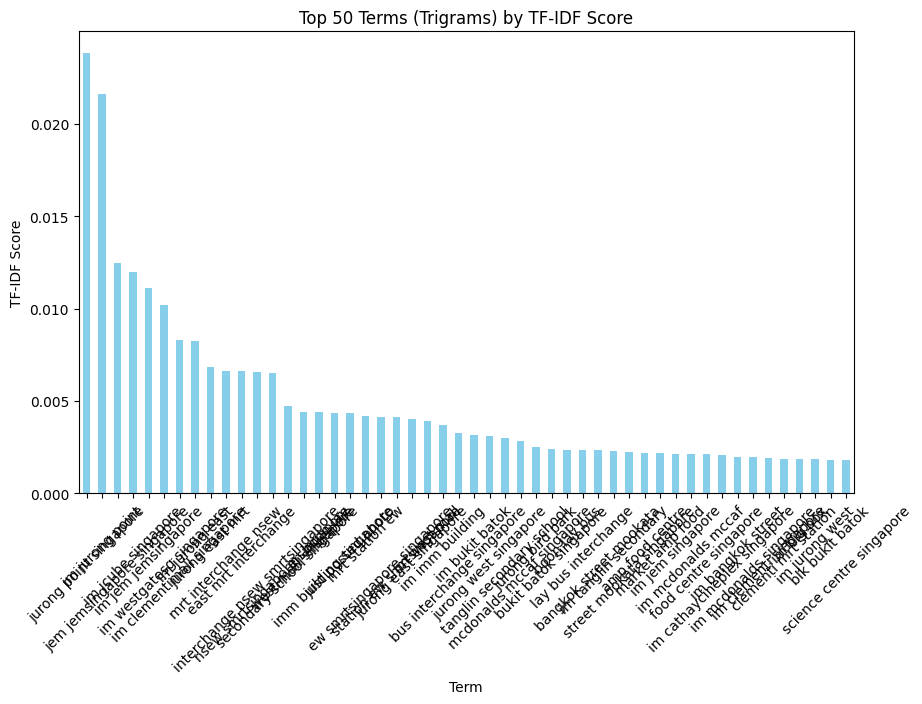

In [ ]:

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    if isinstance(text, float) and math.isnan(text):
        return ''
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

# Apply preprocessing to your text data
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Initialize the TF-IDF vectorizer with unigrams, bigrams, and trigrams
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(3, 3))

# Fit and transform your text data to calculate TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame for easier visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

# Calculate the mean TF-IDF score for each term across all documents
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF scores
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Plot the top N terms by TF-IDF score
top_n = 50  # You can adjust this number as needed
plt.figure(figsize=(10, 6))
sorted_terms[:top_n].plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Terms (Trigrams) by TF-IDF Score')
plt.xlabel('Term')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


### Data Aggregation

 Categories

 Recreation,
 greenery,
 blue spaces,
 food,
 social,
shopping,
bird,
animals,
workout,
church,
meditate,
prayer,
play,
football,
birdpark






###Data Aggregation on Tweets (Count)

{'recreation': 3, 'greenery': 1, 'blue': 554, 'food': 2383, 'social': 129, 'shop': 878, 'bird': 370, 'animals': 25, 'workout': 207, 'church': 90, 'meditate': 2, 'prayer': 101, 'football': 157, 'cosplay': 87, 'play': 1665, 'bird park': 16, 'jurong': 631, 'new': 2349, 'health': 237, 'badminton': 42, 'sweat': 153, 'green': 238, 'trees': 37}


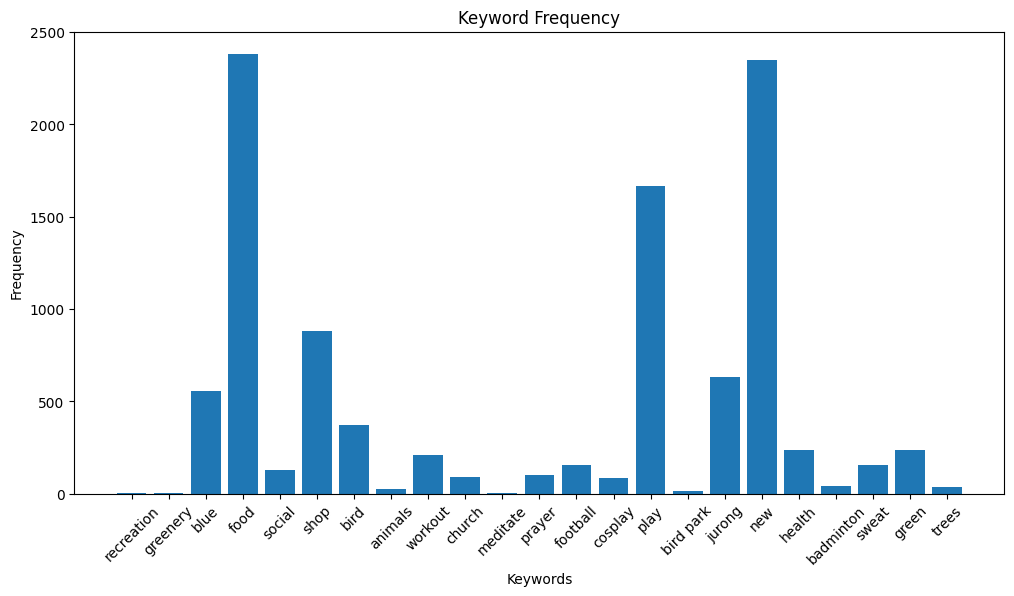

In [ ]:
# Define the list of keywords
keywords = [
    "recreation", "greenery", "blue", "food", "social",
    "shop", "bird", "animals", "workout", "church", "meditate", "prayer", "football", "cosplay","play", "bird park",
    "jurong", "new", "health", "badminton", "sweat", "green", "trees"
]



def check_keyword(text, keyword):
    return keyword in text

# Iterate through the keywords and check their presence in 'df['text']'
for keyword in keywords:
    df[keyword] = df['text'].apply(lambda text: check_keyword(text, keyword))

# Calculate the frequency of each keyword
keyword_frequencies = {keyword: df[keyword].sum() for keyword in keywords}
print(keyword_frequencies)

# Create a new DataFrame to store the keyword frequencies
keyword_df = pd.DataFrame(list(keyword_frequencies.items()), columns=['Keyword', 'Frequency'])

# Plot the keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_df['Keyword'], keyword_df['Frequency'])
plt.title('Keyword Frequency')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



###Data Aggregation on Hashtags (Count)

{'recreation': 0, 'greenery': 1, 'blue': 74, 'food': 885, 'social': 9, 'shop': 40, 'bird': 137, 'animals': 2, 'workout': 34, 'church': 11, 'meditate': 0, 'prayer': 11, 'football': 69, 'cosplay': 77, 'play': 190, 'bird park': 0, 'jurong': 216, 'new': 241, 'health': 42, 'badminton': 5, 'sweat': 14, 'green': 55, 'trees': 7}


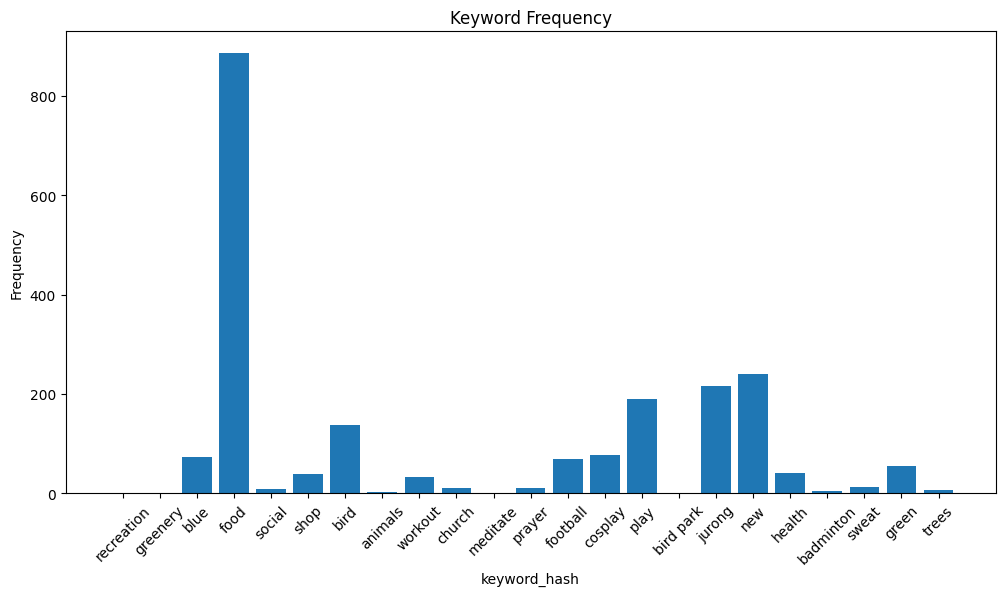

In [ ]:
# Define the list of keywords
keywords = [
    "recreation", "greenery", "blue", "food", "social",
    "shop", "bird", "animals", "workout", "church", "meditate", "prayer", "football", "cosplay","play", "bird park",
    "jurong", "new", "health", "badminton", "sweat", "green", "trees"
]



def check_keyword(text, keyword):
    return keyword in text

# Iterate through the keywords and check their presence in 'df['text']'
for keyword in keywords:
    df[keyword] = df['hashtags'].apply(lambda text: check_keyword(text, keyword))

# Calculate the frequency of each keyword
keyword_frequencies = {keyword: df[keyword].sum() for keyword in keywords}
print(keyword_frequencies)
# Create a new DataFrame to store the keyword frequencies
keyword_df = pd.DataFrame(list(keyword_frequencies.items()), columns=['keyword_hash', 'Frequency'])

# Plot the keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_df['keyword_hash'], keyword_df['Frequency'])
plt.title('Keyword Frequency')
plt.xlabel('keyword_hash')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



# Sentiment Analysis

## Text Blob NLP Model

Perform sentiment analysis on tweets containing these hashtags using the TextBlob library. Here's how to do it.

TextBlob is a Python library that simplifies text processing tasks, including natural language processing (NLP) tasks. TextBlob provides an easy-to-use API for common NLP tasks such as tokenization, part-of-speech tagging, sentiment analysis, translation, and more.

In TextBlob, the "nlp" mode is not a specific model but a way to use TextBlob's built-in functionality for various NLP tasks. It leverages pre-trained models and linguistic data to perform tasks like sentiment analysis, part-of-speech tagging, and text classification.

Perform sentiment analysis on tweets containing these hashtags using the TextBlob library. Here's how I did it

In [ ]:
from textblob import TextBlob


# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to tweets with the top 50 hashtags
top_50_hashtags = df['hashtags'].explode().value_counts().nlargest(50).index

for hashtag in top_50_hashtags:
    hashtag_tweets = df[df['hashtags'].apply(lambda hashtags: hashtag in hashtags)]
    hashtag_tweets['sentiment_score'] = hashtag_tweets['text'].apply(analyze_sentiment)

    # Print sentiment statistics for each hashtag
    print(f"Hashtag: {hashtag}")
    print(f"Average Sentiment: {hashtag_tweets['sentiment_score'].mean():.2f}")
    print(f"Number of Tweets: {len(hashtag_tweets)}")
    print()


NameError: ignored

In [ ]:
from textblob import TextBlob
import pandas as pd

# Load your DataFrame 'df' with the tweets data
# Assuming you have a DataFrame with columns 'text' and the newly added keyword columns
# ...

# Define the list of keywords
keywords = [
    "recreation", "greenery", "blue", "food", "social",
    "shop", "bird", "animals", "workout", "church", "meditate", "prayer", "football", "cosplay","play", "bird park",
    "jurong", "new"
]

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Iterate through the keywords and perform sentiment analysis
for keyword in keywords:
    keyword_tweets = df[df[keyword]]
    keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)

    # Print sentiment statistics for each keyword
    print(f"Keyword: {keyword}")
    print(f"Average Sentiment: {keyword_tweets['sentiment_score'].mean():.2f}")
    print(f"Number of Tweets: {len(keyword_tweets)}")
    print()


<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)
<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)
<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Keyword: recreation
Average Sentiment: 0.00
Number of Tweets: 3

Keyword: greenery
Average Sentiment: 0.00
Number of Tweets: 1

Keyword: blue
Average Sentiment: 0.06
Number of Tweets: 554



<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)
<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)


Keyword: food
Average Sentiment: 0.12
Number of Tweets: 2383

Keyword: social
Average Sentiment: 0.06
Number of Tweets: 129



<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)
<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)
<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Keyword: shop
Average Sentiment: 0.04
Number of Tweets: 878

Keyword: bird
Average Sentiment: 0.12
Number of Tweets: 370

Keyword: animals
Average Sentiment: 0.06
Number of Tweets: 25

Keyword: workout
Average Sentiment: 0.16
Number of Tweets: 207

Keyword: church
Average Sentiment: 0.13
Number of Tweets: 90

Keyword: meditate
Average Sentiment: -0.40
Number of Tweets: 2

Keyword: prayer
Average Sentiment: 0.06
Number of Tweets: 101

Keyword: football
Average Sentiment: 0.06
Number of Tweets: 157



<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)


Keyword: cosplay
Average Sentiment: 0.02
Number of Tweets: 87



<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)
<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)
<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Keyword: play
Average Sentiment: 0.06
Number of Tweets: 1665

Keyword: bird park
Average Sentiment: 0.13
Number of Tweets: 16

Keyword: jurong
Average Sentiment: 0.07
Number of Tweets: 631

Keyword: new
Average Sentiment: 0.14
Number of Tweets: 2349



<ipython-input-61-3f84debdc32f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_tweets['sentiment_score'] = keyword_tweets['text'].apply(analyze_sentiment)


##Zero Shot Learning

Zero-shot learning (ZSL) is a machine learning paradigm that aims to address the problem of classifying or recognizing objects or concepts that have never been seen during the training phase. Traditional machine learning methods typically require a pre-defined set of classes for training, making them inadequate for tasks where new classes can emerge. Zero-shot learning has gained significant attention in recent years due to its potential applications in various domains, including computer vision, natural language processing, and recommendation systems.

Here is a brief literature review of zero-shot learning:

1. Zero-Shot Learning: A Comprehensive Evaluation of the Good, the Bad and the Ugly (2017)
Authors: Yongqin Xian, Bernt Schiele, Zeynep Akata
This paper provides a comprehensive evaluation of existing ZSL methods, categorizing them as "Good," "Bad," or "Ugly" based on their performance and characteristics. It offers insights into the strengths and weaknesses of different ZSL approaches.

2. Zero-Shot Learning in Modern NLP (2019)
Authors: Xiaoxi Mao, Yufang Liu, Ji Liu
This review focuses on the application of ZSL in natural language processing (NLP). It discusses how ZSL techniques are used for tasks like text classification, sentiment analysis, and named entity recognition, where class labels are not predefined.

3. A Comprehensive Survey on Zero-Shot Learning (2020)
Authors: Yongqin Xian, Christoph H. Lampert, Bernt Schiele, Zeynep Akata
This survey provides a comprehensive overview of the state-of-the-art in zero-shot learning. It covers various aspects, including data representation, generative models, evaluation metrics, and applications across computer vision and NLP.
4. Learning to Compare: Relation Network for Few-Shot Learning (2018)
Authors: Flood Sung, Yongxin Yang, Li Zhang, Tao Xiang, Philip Torr, Timothy M. Hospedales
This paper introduces Relation Networks (RNs) for few-shot and zero-shot learning tasks. RNs are designed to model relationships between features, enabling effective recognition of unseen classes.
5. Attribute-Based Generalization Beyond the Seen Data (2015)
Authors: Mohammad Amin Sadeghi, Ali Farhadi
This paper introduces a method for zero-shot learning based on attributes, which are semantic descriptions of object properties. It demonstrates the effectiveness of attribute-based models for recognizing unseen classes.
6. A Joint Model for 2D and 3D Pose Estimation from a Single Image (2016)
Authors: Jonathan Tompson, Arjun Jain, Yann LeCun, Christoph Bregler
While primarily focused on pose estimation, this paper introduces a method that combines zero-shot learning and convolutional neural networks (CNNs) to recognize object categories not seen during training.
7. Zero-Shot Learning in Modern NLP: A Comprehensive Survey (2021)
Authors: Sri Harsha Veeramachaneni, Mohammad Rostami, Mohammad Samragh, Mohammad Reza Loghmani, Aniket Bajpai
This recent survey specifically explores the application of zero-shot learning in natural language processing, highlighting various techniques and challenges in this domain.


These papers and surveys provide a solid foundation for understanding the principles, challenges, and recent advancements in zero-shot learning across different domains. Researchers continue to explore new techniques and applications, making ZSL a vibrant and evolving field in machine learning.

#Literature Review- Top 3 ways

Classifying Twitter data can be a valuable task for various applications, such as sentiment analysis, topic modeling, or identifying user behavior patterns. If you have unlabeled Twitter data and are looking for classification methods, consider the following top three approaches, including semi-supervised techniques:

1. **Semi-Supervised Learning with Pre-trained Language Models (PLMs):**
   - Utilize pre-trained language models like BERT, GPT-3, or RoBERTa to perform semi-supervised learning. These models have been trained on massive text corpora and can capture complex linguistic patterns.
   - Start by fine-tuning a pre-trained model on a small labeled dataset that you can create manually or acquire through crowdsourcing. For example, you can label a subset of tweets for sentiment analysis.
   - After fine-tuning, use the model to make predictions on your larger unlabeled dataset. This method leverages the pre-trained model's understanding of language to classify tweets effectively.
   - Techniques such as self-training, where the model labels unlabeled data with high confidence, can further improve classification performance.

2. **Transfer Learning with Pre-trained Embeddings:**
   - Transfer learning with word embeddings like Word2Vec, GloVe, or FastText is an effective approach when labeled data is limited.
   - Begin by training word embeddings on a large corpus of text data, including Twitter data if available. These embeddings capture semantic relationships between words.
   - Use the pre-trained embeddings to represent the words or phrases in your Twitter data.
   - Train a classifier, such as a logistic regression model or a support vector machine (SVM), on the labeled data using these embeddings as features.
   - Apply the trained classifier to your unlabeled Twitter data for classification.

3. **Topic Modeling with Latent Dirichlet Allocation (LDA):**
   - Topic modeling is a useful unsupervised technique for understanding the main themes or topics within a collection of tweets.
   - Apply Latent Dirichlet Allocation (LDA), a popular topic modeling algorithm, to your unlabeled Twitter data.
   - LDA identifies latent topics by modeling the probability distribution of words in documents. Each tweet can be associated with one or more topics.
   - Analyze the results to discover recurring themes and categorize tweets accordingly. While this approach may not provide explicit labels, it can offer insights into the content and trends within your dataset.


#Performance Validation

Evaluating the performance of classification models on Twitter data, especially in scenarios with limited labeled data, is essential to assess their effectiveness. Here are some strategies to validate and measure the average performance of the models mentioned earlier:

1. **Cross-Validation:**
   - Implement k-fold cross-validation, typically with k=5 or k=10, to assess model performance. Split your labeled dataset into k subsets (folds), and iteratively train and test the model on different combinations of training and validation sets.
   - Calculate performance metrics (e.g., accuracy, precision, recall, F1-score) for each fold and then average these metrics across all folds. This helps provide a more robust estimate of model performance.

2. **Hold-Out Validation:**
   - Reserve a portion of your labeled data (e.g., 20-30%) as a hold-out validation set. Train the model on the remaining data and evaluate its performance on the validation set.
   - This approach provides a single performance estimate and is suitable for initial model assessment.

3. **Bootstrapping:**
   - If your labeled dataset is small, consider bootstrapping. Randomly sample subsets of your data with replacement to create multiple datasets.
   - Train and test your model on each bootstrapped dataset and calculate performance metrics for each iteration.
   - Compute the average and confidence intervals of the performance metrics based on the bootstrapped results.

4. **Evaluation Metrics:**
   - Choose appropriate evaluation metrics based on your specific classification task:
     - For sentiment analysis: Consider metrics like accuracy, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) if applicable.
     - For topic modeling: Metrics such as coherence score, perplexity, and topic distribution similarity can be informative.
     - For binary or multiclass classification: Use precision, recall, F1-score, and the confusion matrix.

5. **Hyperparameter Tuning:**
   - Conduct hyperparameter tuning to optimize model performance. Experiment with different hyperparameters (e.g., learning rate, batch size, model architecture) to find the best configuration.
   - Use techniques like grid search or random search to efficiently explore the hyperparameter space.

6. **Benchmarking Against Baselines:**
   - Compare the performance of your models against baseline models. Baselines can include simple rule-based approaches or using pre-trained models without fine-tuning.
   - Benchmarking helps you understand whether your model provides a significant improvement over simpler methods.

7. **Cross-Dataset Validation:**
   - If possible, validate your models on additional datasets with similar characteristics. This can help assess the model's generalizability.

8. **Qualitative Analysis:**
   - Beyond quantitative metrics, perform qualitative analysis by reviewing misclassified samples. This can provide insights into the types of errors the model makes and potential areas for improvement.

9. **Ensemble Methods:**
   - Consider using ensemble methods like bagging or boosting to combine the predictions of multiple models. Ensembles can often improve overall performance.

10. **A/B Testing (if applicable):**
    - If you plan to deploy the model for a specific application (e.g., content recommendation), conduct A/B testing to measure its real-world impact on user engagement or other relevant metrics.



#Sample Twitter Scraping Queries

##General Query

In [ ]:
import tweepy

# Replace with your own API keys and tokens
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create an API object
api = tweepy.API(auth)

# Screen name of the Twitter user whose timeline you want to scrape
screen_name = 'twitterusername'

# Number of tweets to fetch (maximum is 200 per request)
tweet_count = 100

# Fetch tweets from the user's timeline
tweets = api.user_timeline(screen_name=screen_name, count=tweet_count, tweet_mode="extended")

# Process and print the tweets
for tweet in tweets:
    print(tweet.created_at, tweet.full_text)

# Save the tweets to a file or perform further analysis as needed


##Query by hashtag

In [ ]:
import tweepy

# Replace with your own API keys and tokens
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create an API object
api = tweepy.API(auth)

# Hashtag to search for
hashtag = 'your_hashtag'

# Number of tweets to fetch (maximum is 100)
tweet_count = 100

# Fetch tweets containing the hashtag
tweets = tweepy.Cursor(api.search, q=f'#{hashtag}', count=tweet_count, tweet_mode="extended").items(tweet_count)

# Process and print the tweets
for tweet in tweets:
    print(tweet.created_at, tweet.full_text)

# Save the tweets to a file or perform further analysis as needed


In [ ]:
!zip -r /content/heatmaps.zip /content/heatmaps

  adding: content/heatmaps/ (stored 0%)
  adding: content/heatmaps/heatmap_['#AskJuanKarlos'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#VSCOcam'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#tb'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#ShowtimeMakesPeopleHappy'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#ALDUBMostAwaitedDate'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#BridgesOfLoveTheRelease'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#BridgesOfLoveTheNeed'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#BridgesOfLoveTheTest'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#Endomondo', '#endorphins'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#canlaskids'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#JKBirthdayShow'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#ootd'].html (deflated 76%)
  adding: content/heatmaps/heatmap_['#Happy14th